# Data Cleaning 
# Exploratory Data Analysis
# Features Engineering

In [8]:
# imports all the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
# import the dataset
data = pd.read_csv("./data/goole_playstore_data_with_eda/googleplaystore.csv")
data.head(2)
# data.shape

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


In [26]:
# cleaning this datasets
# data.info()
'''
    Data columns (total 13 columns):
    #   Column          Non-Null Count  Dtype  
    ---  ------          --------------  -----  
    0   App             10841 non-null  object 
    1   Category        10841 non-null  object 
    2   Rating          9367 non-null   float64
    3   Reviews         10841 non-null  object 
    4   Size            10841 non-null  object 
    5   Installs        10841 non-null  object 
    6   Type            10840 non-null  object 
    7   Price           10841 non-null  object 
    8   Content Rating  10840 non-null  object 
    9   Genres          10841 non-null  object 
    10  Last Updated    10841 non-null  object 
    11  Current Ver     10833 non-null  object 
    12  Android Ver     10838 non-null  object 
'''
# data.isnull().sum()
'''
    App                  0
    Category             0
    Rating            1474
    Reviews              0
    Size                 0
    Installs             0
    Type                 1
    Price                0
    Content Rating       1
    Genres               0
    Last Updated         0
    Current Ver          8
    Android Ver          3
    dtype: int64
'''

data.describe()
'''
	Rating
    count	9367.000000
    mean	4.193338
    std	0.537431
    min	1.000000
    25%	4.000000
    50%	4.300000
    75%	4.500000
    max	19.000000
'''


'\n\tRating\n    count\t9367.000000\n    mean\t4.193338\n    std\t0.537431\n    min\t1.000000\n    25%\t4.000000\n    50%\t4.300000\n    75%\t4.500000\n    max\t19.000000\n'

# Data Cleaning
# insight and observation
##### The dataset has missing value


In [27]:
data.head(2)
# see the value type of review
data['Reviews'].unique()

array(['159', '967', '87510', ..., '603', '1195', '398307'],
      shape=(6002,), dtype=object)

In [28]:
data['Reviews'].str.isnumeric().sum()
# data.shape

np.int64(10840)

In [29]:
# find the non numeric columns
data[~data['Reviews'].str.isnumeric()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [31]:
# convert this object in integer
# data[~data['Reviews'].str.isnumeric()].drop
# drop this object review row
# create a copy
data_copy = data.copy()

In [32]:
data_copy = data_copy.drop(data_copy.index[10472])

In [33]:
data_copy[~data_copy['Reviews'].str.isnumeric()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [34]:
# convert to this review to in
data_copy['Reviews'] = data_copy['Reviews'].astype(int)

In [35]:
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int64  
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1.2+ MB


In [36]:
# Cleaning the size columns
data_copy['Size'].unique()
# data_copy['Size'].str.isnumeric()
# data_copy['Size'].isnull().sum()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [37]:
# million -> k
# '19M' == '19000K'
data_copy['Size'] = data_copy['Size'].str.replace('M', '000')
data_copy['Size'] = data_copy['Size'].str.replace('k', '')
data_copy['Size'] = data_copy['Size'].replace('Varies with device', np.nan)
data_copy['Size'] = data_copy['Size'].astype(float)

In [38]:
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int64  
 4   Size            9145 non-null   float64
 5   Installs        10840 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 1.2+ MB


In [39]:
data_copy['Installs'] = data_copy['Installs'].str.replace('+', '')
data_copy['Installs'] = data_copy['Installs'].replace('Free', np.nan)

In [16]:
data_copy['Installs']

0            10,000
1           500,000
2         5,000,000
3        50,000,000
4           100,000
            ...    
10836         5,000
10837           100
10838         1,000
10839         1,000
10840    10,000,000
Name: Installs, Length: 10840, dtype: object

In [40]:
data_copy.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [51]:
# cleans price and install
chart_to_remove = ['+', ',', '$']
cols_to_clean = ['Installs', 'Price']
for char in chart_to_remove:
    for col in cols_to_clean:
        data_copy[col] = data_copy[col].str.replace(char, '')

In [42]:
data_copy.head()
data_copy['Price'].unique()
data_copy['Installs'].unique()

array(['10000', '500000', '5000000', '50000000', '100000', '50000',
       '1000000', '10000000', '5000', '100000000', '1000000000', '1000',
       '500000000', '50', '100', '500', '10', '1', '5', '0'], dtype=object)

In [50]:
data_copy.head()
data_copy['Price'].astype(float)
data_copy['Installs'].astype(int)

0           10000
1          500000
2         5000000
3        50000000
4          100000
           ...   
10836        5000
10837         100
10838        1000
10839        1000
10840    10000000
Name: Installs, Length: 10840, dtype: int64

In [44]:
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int64  
 4   Size            9145 non-null   float64
 5   Installs        10840 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 1.2+ MB


In [49]:
data_copy.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [52]:
# convert Last Updated to datetime
# data_copy['Last Updated'] = pd.to_datetime(data_copy['Last Updated'])
data_copy['Day'] = data_copy['Last Updated'].dt.day
data_copy['Month'] = data_copy['Last Updated'].dt.month
data_copy['Year'] = data_copy['Last Updated'].dt.year


AttributeError: Can only use .dt accessor with datetimelike values

In [47]:
# data_copy.info()
# data_copy.drop('Last Updated', axis=1, inplace=True)
data_copy.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


In [ ]:
data_copy['Size'].unique()

array([1.90e+04, 1.40e+04, 8.70e+00, 2.50e+04, 2.80e+00, 5.60e+00,
       2.90e+04, 3.30e+04, 3.10e+00, 2.80e+04, 1.20e+04, 2.00e+04,
       2.10e+04, 3.70e+04, 2.70e+00, 5.50e+00, 1.70e+04, 3.90e+04,
       3.10e+04, 4.20e+00, 7.00e+00, 2.30e+04, 6.00e+00, 6.10e+00,
       4.60e+00, 9.20e+00, 5.20e+00, 1.10e+04, 2.40e+04,      nan,
       9.40e+00, 1.50e+04, 1.00e+04, 1.20e+00, 2.60e+04, 8.00e+00,
       7.90e+00, 5.60e+04, 5.70e+04, 3.50e+04, 5.40e+04, 2.01e+02,
       3.60e+00, 5.70e+00, 8.60e+00, 2.40e+00, 2.70e+04, 2.50e+00,
       1.60e+04, 3.40e+00, 8.90e+00, 3.90e+00, 2.90e+00, 3.80e+04,
       3.20e+04, 5.40e+00, 1.80e+04, 1.10e+00, 2.20e+00, 4.50e+00,
       9.80e+00, 5.20e+04, 9.00e+00, 6.70e+00, 3.00e+04, 2.60e+00,
       7.10e+00, 3.70e+00, 2.20e+04, 7.40e+00, 6.40e+00, 3.20e+00,
       8.20e+00, 9.90e+00, 4.90e+00, 9.50e+00, 5.00e+00, 5.90e+00,
       1.30e+04, 7.30e+04, 6.80e+00, 3.50e+00, 4.00e+00, 2.30e+00,
       7.20e+00, 2.10e+00, 4.20e+04, 7.30e+00, 9.10e+00, 5.50e

In [155]:
# save this dataset copy dataset
data_copy.to_csv('data/google_cleaned.csv')

# Exploratory Data Analysis

In [9]:
dataset = pd.read_csv('./data/goole_playstore_data_with_eda/google_cleaned.csv')

In [157]:
dataset.head(2)

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver,Day,Month,Year
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,1.0.0,4.0.3 and up,7,1,2018
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2.0.0,4.0.3 and up,15,1,2018


In [10]:
# check app value duplicate
# np.int64(1181) (1181, 16)
# see dupicate data
dataset[dataset['App'].duplicated()].shape

(1181, 16)

Drop duplicate value

In [11]:
dataset = dataset.drop_duplicates(subset=['App'], keep='first')

In [166]:
dataset.shape

(9659, 16)

# Explore data

In [12]:
# explore categorical and numerical data
numerical_features = [col for col  in dataset.columns if dataset[col].dtype != 'object']
categorical_features = [col for col in dataset.columns if dataset[col].dtype == 'object']

In [176]:
len(numerical_features)
# dataset.info()

numerical_features, categorical_features

(['Unnamed: 0',
  'Rating',
  'Reviews',
  'Size',
  'Installs',
  'Price',
  'Day',
  'Month',
  'Year'],
 ['App',
  'Category',
  'Type',
  'Content Rating',
  'Genres',
  'Current Ver',
  'Android Ver'])

## 3.2 Feature Information
1. App :- Name of the App
2. Category :- Category under which the App falls.
3. Rating :- Application's rating on playstore
4. Reviews :- Number of reviews of the App.
5. Size :- Size of the App.
6. Install :- Number of Installs of the App
7. Type :- If the App is free/paid
8. Price :- Price of the app (0 if it is Free)
9. Content Rating :- Appropiate Target Audience of the App.
10. Genres:- Genre under which the App falls.
11. Last Updated :- Date when the App was last updated
12. Current Ver :- Current Version of the Application
13. Android Ver :- Minimum Android Version required to run the App

In [13]:
# get all count for this categorical columns
for col in categorical_features:
    print(dataset[col].value_counts(normalize=True) * 100)
    print('------------------------------')

App
iHoroscope - 2018 Daily Horoscope & Astrology         0.010353
Photo Editor & Candy Camera & Grid & ScrapBook        0.010353
Coloring book moana                                   0.010353
U Launcher Lite – FREE Live Cool Themes, Hide Apps    0.010353
Sketch - Draw & Paint                                 0.010353
                                                        ...   
Learn To Draw Kawaii Characters                       0.010353
3D Color Pixel by Number - Sandbox Art Coloring       0.010353
Mandala Coloring Book                                 0.010353
Tattoo Name On My Photo Editor                        0.010353
Name Art Photo Editor - Focus n Filters               0.010353
Name: proportion, Length: 9659, dtype: float64
------------------------------
Category
FAMILY                 18.966767
GAME                    9.928564
TOOLS                   8.561963
BUSINESS                4.348276
MEDICAL                 4.089450
PERSONALIZATION         3.892743
PRODUCTIVITY      

C:\Users\USER\AppData\Local\Temp\ipykernel_17860\292205298.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=dataset[numerical_features[i]],shade=True, color='r')
C:\Users\USER\AppData\Local\Temp\ipykernel_17860\292205298.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=dataset[numerical_features[i]],shade=True, color='r')
C:\Users\USER\AppData\Local\Temp\ipykernel_17860\292205298.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=dataset[numerical_features[i]],shade=True, color='r')
C:\Users\USER\AppData\Local\Temp\ipykernel_17860\292205298.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`;

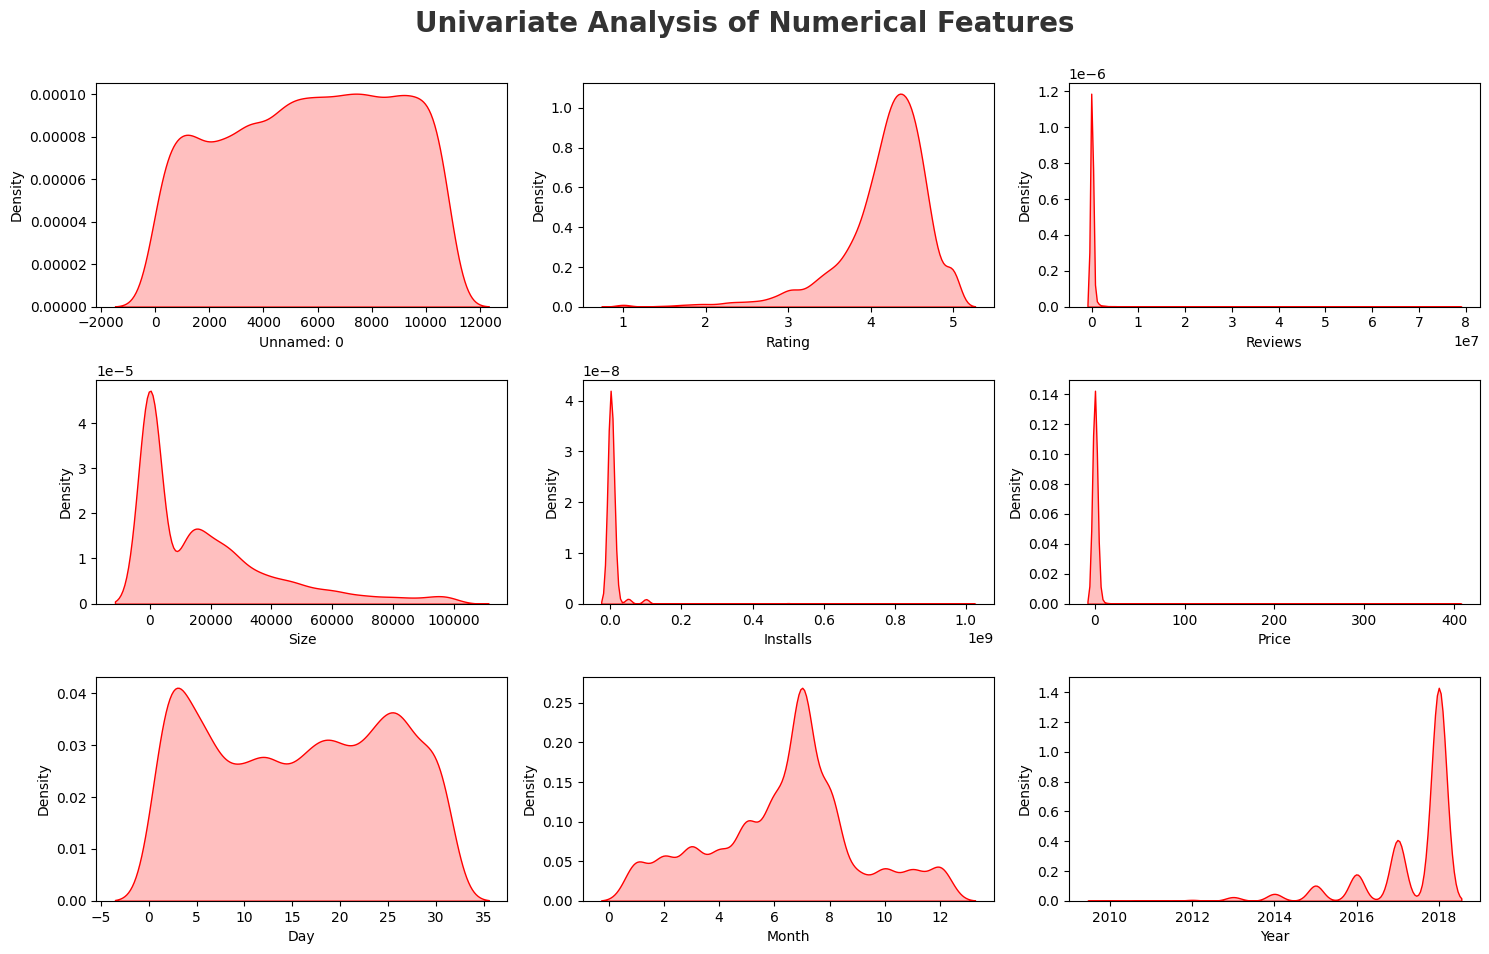

In [14]:
## Proportion of count data on numerical columns
plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(numerical_features)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=dataset[numerical_features[i]],shade=True, color='r')
    plt.xlabel(numerical_features[i])
    plt.tight_layout()

In [ ]:
## Proportion of count data on categorical columns

plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(categorical_features)):
    plt.subplot(5, 3, i+1)
    sns.countplot(x=dataset[categorical_features[i]], palette="Set2")
    plt.xlabel(categorical_features[i])
    plt.xticks(rotation = 45)
    plt.tight_layout()

C:\Users\USER\AppData\Local\Temp\ipykernel_19956\3480677609.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=dataset[categorical_features[i]], palette="Set2")


KeyboardInterrupt: 

In [15]:
dataset.head()

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver,Day,Month,Year
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,1.0.0,4.0.3 and up,7,1,2018
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2.0.0,4.0.3 and up,15,1,2018
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,1.2.4,4.0.3 and up,1,8,2018
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,Varies with device,4.2 and up,8,6,2018
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,1.1,4.4 and up,20,6,2018


<Axes: ylabel='count'>

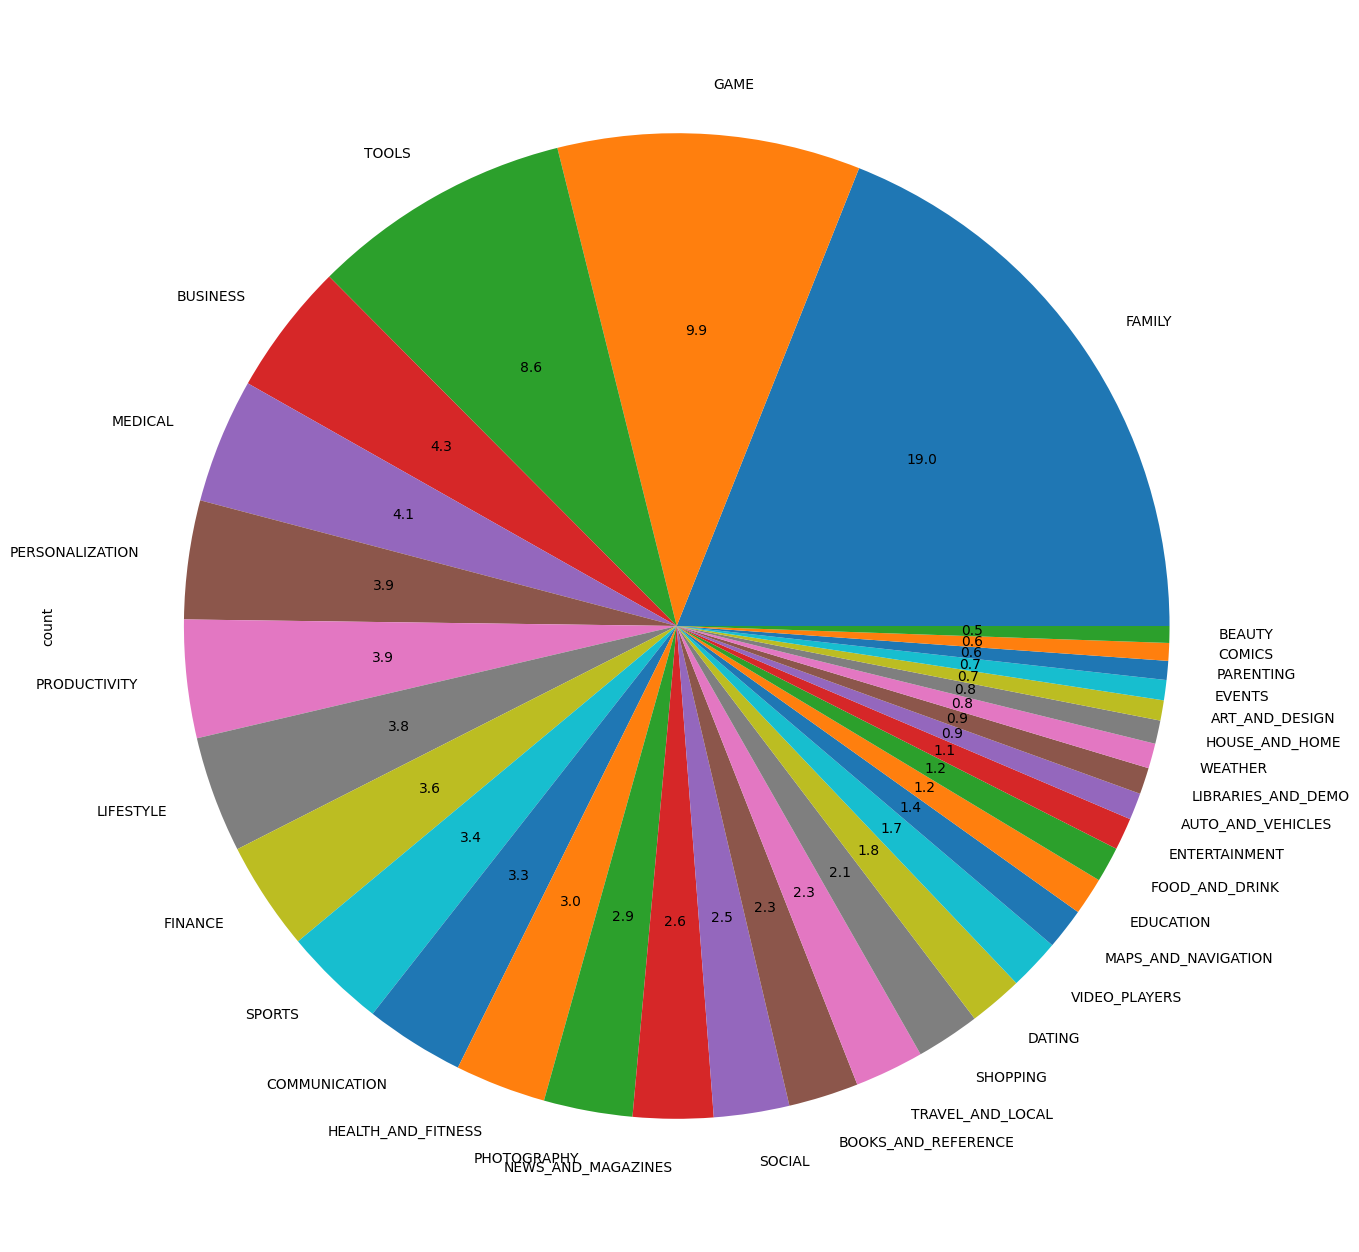

In [24]:
dataset['Category'].value_counts().plot.pie(y=dataset['Category'], figsize = (20, 16), autopct = '%1.1f')

In [53]:
# see top ten app category
# category = pd.DataFrame(dataset["Category"].value_counts())
# category.rename(columns={'Category': 'Count'}, inplace=True)
# category.index[:10]

# Reset the index so 'Category' becomes a column
category = pd.DataFrame(dataset["Category"].value_counts()).reset_index()
category.rename(columns={'Category': 'Count'}, inplace=True)
category

,Count,count
0,FAMILY,1832
1,GAME,959
2,TOOLS,827
3,BUSINESS,420
4,MEDICAL,395
5,PERSONALIZATION,376
6,PRODUCTIVITY,374
7,LIFESTYLE,369
8,FINANCE,345
9,SPORTS,325


C:\Users\USER\AppData\Local\Temp\ipykernel_17860\1570542907.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category['Count'][:10], y='count', data=category[:10], palette='hls')


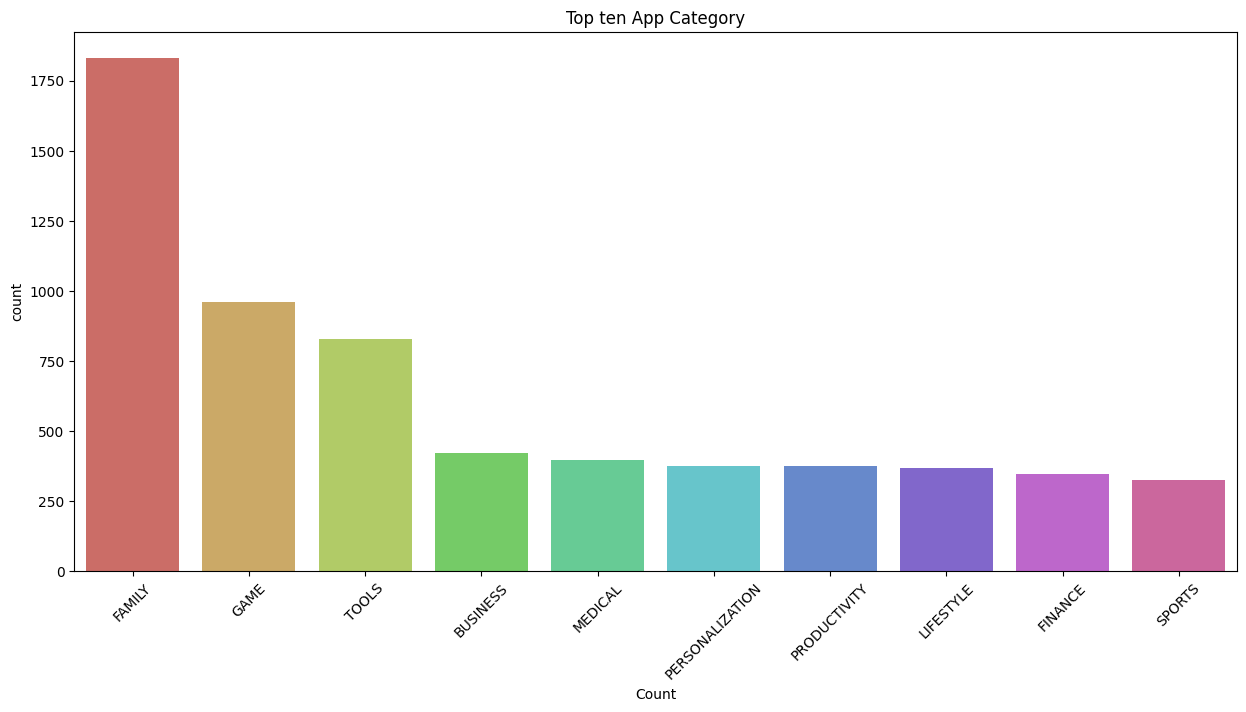

In [65]:
plt.figure(figsize=(15, 7))
sns.barplot(x=category['Count'][:10], y='count', data=category[:10], palette='hls')
plt.title("Top ten App Category")
plt.xticks(rotation = 45)
plt.show()

In [56]:
# Group by 'App' and sum the 'Installs'
top_installed_apps = dataset.groupby('App')['Installs'].sum().reset_index()

# Sort by 'Installs' in descending order
top_installed_apps = top_installed_apps.sort_values(by='Installs', ascending=False).head(10)

# Display the top ten installed applications
print(top_installed_apps)

# dataset.head()

                                           App    Installs
9041                        WhatsApp Messenger  1000000000
7844             Skype - free IM & video calls  1000000000
9225                                   YouTube  1000000000
4912                                    Google  1000000000
6165  Messenger – Text and Video Chat for Free  1000000000
6050                 Maps - Navigate & Explore  1000000000
4924                              Google Drive  1000000000
4328                                  Facebook  1000000000
4933                               Google News  1000000000
5118                                  Hangouts  1000000000


C:\Users\USER\AppData\Local\Temp\ipykernel_17860\3446199759.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='App', y='Installs', data=top_installed_apps, palette='viridis')


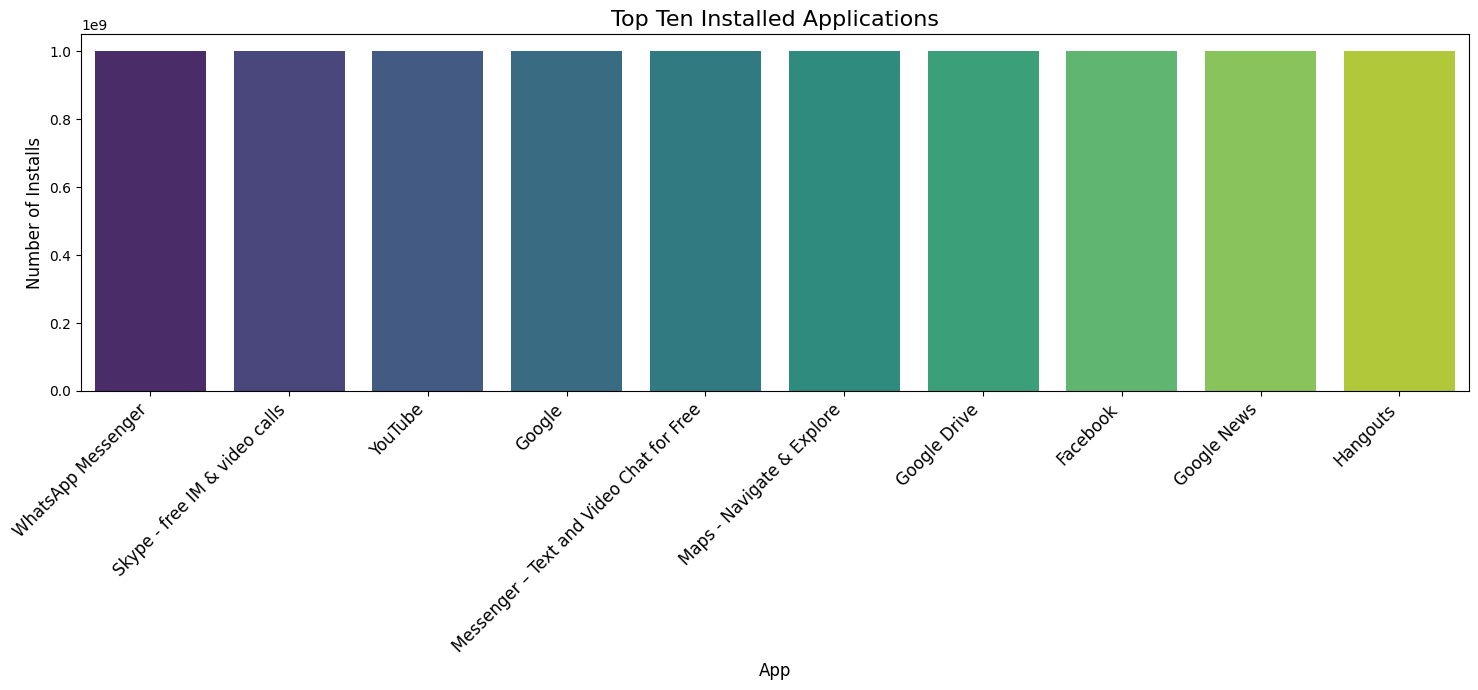

In [64]:
top_installed_apps = dataset.groupby('App')['Installs'].sum().reset_index().sort_values('Installs', ascending=False).head(10)

# Plot the results
plt.figure(figsize=(15, 7))
sns.barplot(x='App', y='Installs', data=top_installed_apps, palette='viridis')
plt.title("Top Ten Installed Applications", fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.ylabel("Number of Installs", fontsize=12)
plt.xlabel("App", fontsize=12)
plt.tight_layout()
plt.show()